#**Penguin Species Clustering and Classification**

This project will help you classify penguin species.

In [92]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
from tqdm import tqdm
import joblib
import pickle
warnings.filterwarnings('ignore')

In [42]:
# loading dataset
data = pd.read_csv('/content/penguins.csv')
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [43]:
# Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [44]:
# Checking for null values
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [45]:
# Droping the detected null values
df = data.dropna()
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [46]:
# Encoding the categorical variable
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,2
342,45.2,14.8,212.0,5200.0,1


In [47]:
# Normalizing the data
mms = MinMaxScaler(feature_range=(0, 1))

x = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for i in x:
  df[[i]] = mms.fit_transform(df[[i]])
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.254545,0.666667,0.060990,0.291667,2
1,0.269091,0.511905,0.061964,0.305556,1
2,0.298182,0.583333,0.063718,0.152778,1
4,0.167273,0.738095,0.063328,0.208333,1
5,0.261818,0.892857,0.062744,0.263889,2
...,...,...,...,...,...
338,0.549091,0.071429,0.067420,0.618056,1
340,0.534545,0.142857,0.067615,0.597222,1
341,0.665455,0.309524,0.068979,0.847222,2
342,0.476364,0.202381,0.067030,0.694444,1


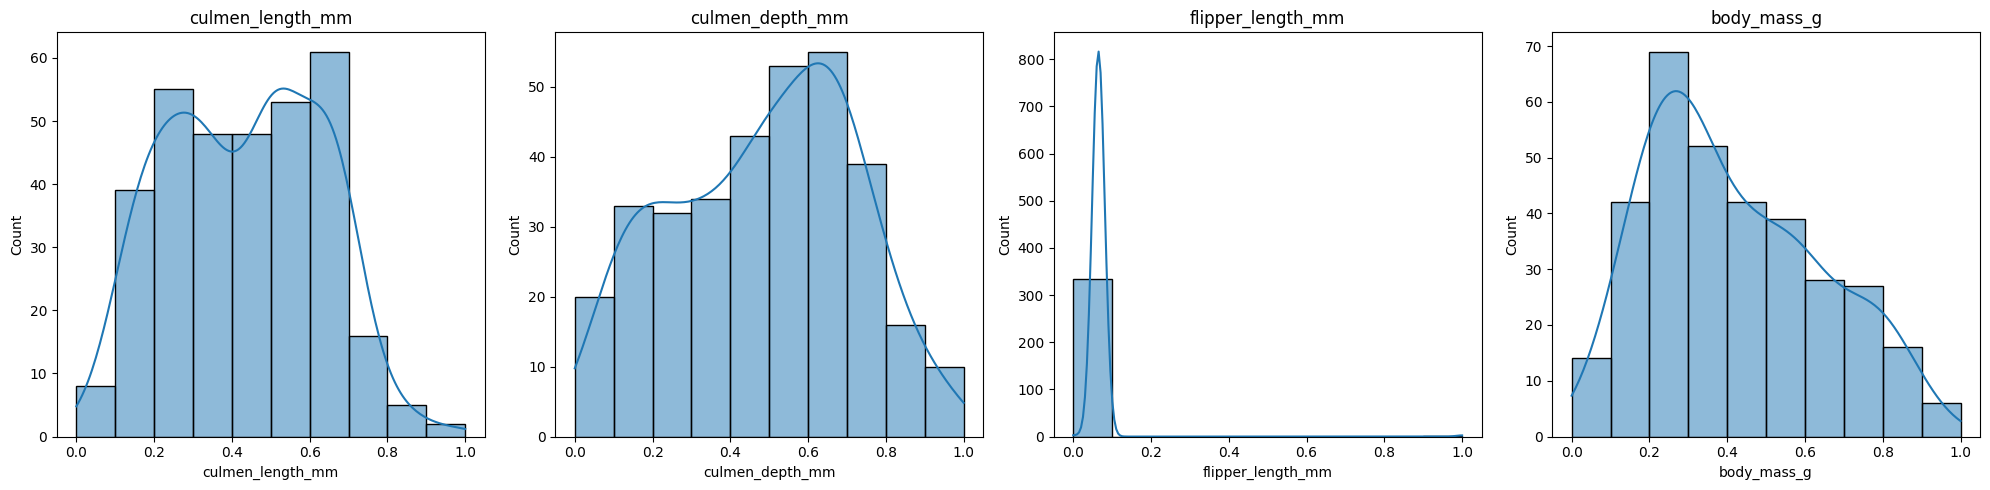

In [48]:
# Checking the distribution of the data
n = df.drop('sex', axis=1)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes = axes.flatten()

for i, column in enumerate(n.columns):
  sns.histplot(df[column], kde=True, bins=10, ax=axes[i])
  axes[i].set_title(column)

plt.tight_layout();

In [49]:
# Checking skewness in the data
df.skew()

culmen_length_mm      0.047756
culmen_depth_mm      -0.145627
flipper_length_mm    18.087397
body_mass_g           0.465940
sex                  -0.075458
dtype: float64

In [50]:
# Describing the data for better understanding
n.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,0.432304,0.484471,0.067489,0.419216
std,0.198307,0.234758,0.051296,0.223232
min,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.062744,0.236111
50%,0.450909,0.500000,0.064108,0.375000
75%,0.598182,0.666667,0.067225,0.579861
max,1.000000,1.000000,1.000000,1.000000


In [51]:
# Checkin for outliers in the normaly distributed data
m = ['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g']

for i in m:
  print("{} Highest Allowed :".format(i), df[i].mean() + 3*df[i].std())
  print("{} Lowest Allowed :".format(i), df[i].mean() - 3*df[i].std())

culmen_length_mm Highest Allowed : 1.0272235236063805
culmen_length_mm Lowest Allowed : -0.16261565386418236
culmen_depth_mm Highest Allowed : 1.1887441748763123
culmen_depth_mm Lowest Allowed : -0.21980316563679525
body_mass_g Highest Allowed : 1.0889109970184918
body_mass_g Lowest Allowed : -0.2504781611975962


In [52]:
df[(df['culmen_length_mm'] > 1.02) | (df['culmen_length_mm'] < -0.16)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [53]:
df[(df['culmen_depth_mm'] > 1.18) | (df['culmen_depth_mm'] < -0.21)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [54]:
df[(df['body_mass_g'] > 1.08) | (df['body_mass_g'] < -0.25)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


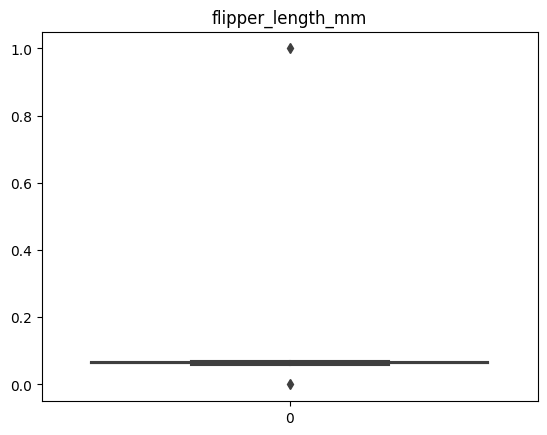

In [55]:
# Checking for outliers in the skewed data
sns.boxplot(df['flipper_length_mm'])
plt.title('flipper_length_mm');

In [56]:
df['flipper_length_mm'].describe()

count    335.000000
mean       0.067489
std        0.051296
min        0.000000
25%        0.062744
50%        0.064108
75%        0.067225
max        1.000000
Name: flipper_length_mm, dtype: float64

In [57]:
# Removing detected outliers from the skewed data
from pydoc import locate
percentile_25 = df['flipper_length_mm'].quantile(0.25)
percentile_75 = df['flipper_length_mm'].quantile(0.75)

iqr = percentile_75 - percentile_25

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

df['flipper_length_mm'] = np.where(
    df['flipper_length_mm'] >= upper_limit,
    upper_limit,
    np.where(
        df['flipper_length_mm'] <= lower_limit,
        lower_limit,
        df['flipper_length_mm']
        )
    )

In [58]:
df['flipper_length_mm'].describe()

count    335.000000
mean       0.064892
std        0.002815
min        0.056021
25%        0.062744
50%        0.064108
75%        0.067225
max        0.073948
Name: flipper_length_mm, dtype: float64

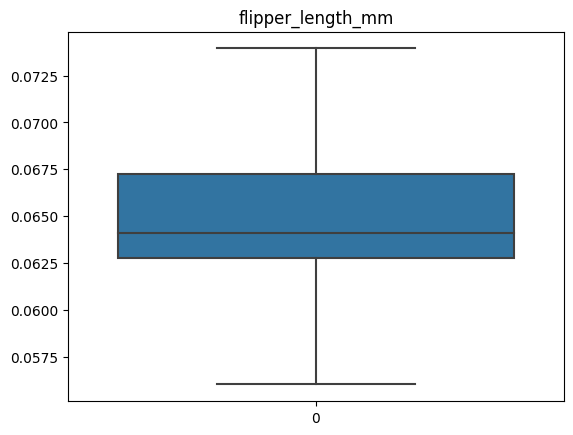

In [59]:
sns.boxplot(df['flipper_length_mm'])
plt.title('flipper_length_mm');

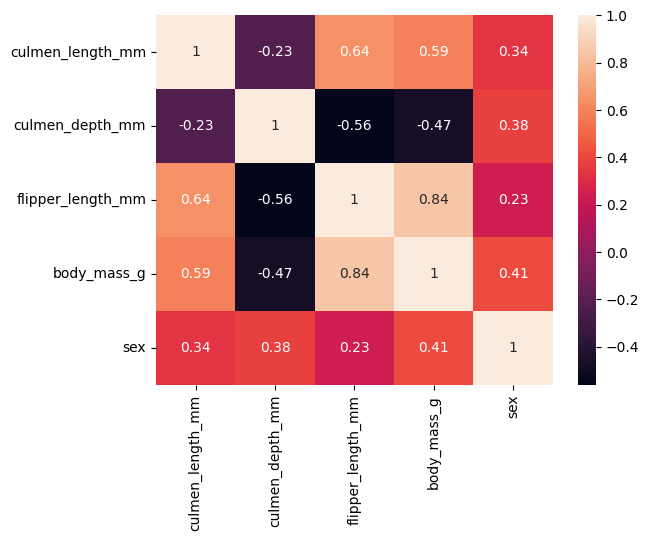

In [60]:
# Checking the correlation in the data
sns.heatmap(df.corr(), annot=True);

In [61]:
# Reducing the dimensions in the data using Principal Component Analysis
pca = PCA(n_components=2)
pca_model = pca.fit_transform(df)
pca_data = pd.DataFrame(pca_model, columns=['PCA1', 'PCA2'])
pca_data

,PCA1,PCA2
0,-0.455134,-0.310439
1,0.521228,-0.118512
2,0.534797,-0.247651
3,0.518332,-0.371822
4,-0.487691,-0.476188
...,...,...
330,0.490883,0.483861
331,0.485440,0.417180
332,-0.565526,0.438584
333,0.465610,0.412478


In [62]:
# Creating a list and dictionaries of models and their parameters and evaluation metrics for validating cluster models and for hyperparameter tuning
algorithms = [KMeans, AgglomerativeClustering, DBSCAN]

hyperparameters = {
    KMeans:range(2,11),
    AgglomerativeClustering:['ward', 'complete', 'average', 'single'],
    DBSCAN:[0.1, 0.25, 0.1]
    }

evaluation_metrics = {
    'Silhoette Score':silhouette_score,
    'Davies-Bouldin Index':davies_bouldin_score,
    'Calinski Harabasz Index':calinski_harabasz_score
    }

In [63]:
# Validating cluster models and performing hyperparameters tuning
results = {}

for algorithm in tqdm(algorithms, desc='Algorithms'):
  for param in tqdm(hyperparameters[algorithm], desc='Hyperparameters'):
    if algorithm == AgglomerativeClustering:
      model = AgglomerativeClustering(n_clusters=3, linkage=param)
    else:
      model = algorithm(param)
    labels = model.fit_predict(df)

    for metric_name, metric_func in evaluation_metrics.items():
      score = metric_func(df, labels)
      results[f'{algorithm.__name__}_{param}_{metric_name}'] = score

Algorithms: 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


In [64]:
# Creating data frame for viewing results from Validating cluster models and hyperparameters tuning to find the best model
df1 = pd.DataFrame({'Algorithms Details':results.keys(), 'Scores':results.values()})
df1

,Algorithms Details,Scores
0,KMeans_2_Silhoette Score,0.614657
1,KMeans_2_Davies-Bouldin Index,0.647590
2,KMeans_2_Calinski Harabasz Index,726.713922
3,KMeans_3_Silhoette Score,0.593901
4,KMeans_3_Davies-Bouldin Index,0.580172
5,KMeans_3_Calinski Harabasz Index,644.740973
6,KMeans_4_Silhoette Score,0.587469
7,KMeans_4_Davies-Bouldin Index,0.598219
8,KMeans_4_Calinski Harabasz Index,858.459183
9,KMeans_5_Silhoette Score,0.578212


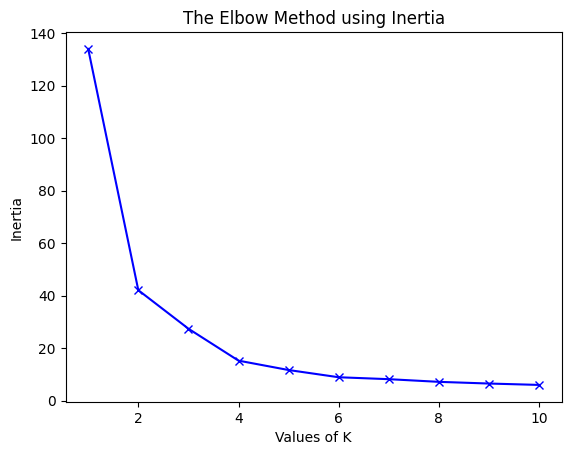

In [65]:
# Cross checking the value of k using the elbow method to find the best value of k
inertia =[]
range_values = range(1, 11)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit_predict(df)
  inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia');

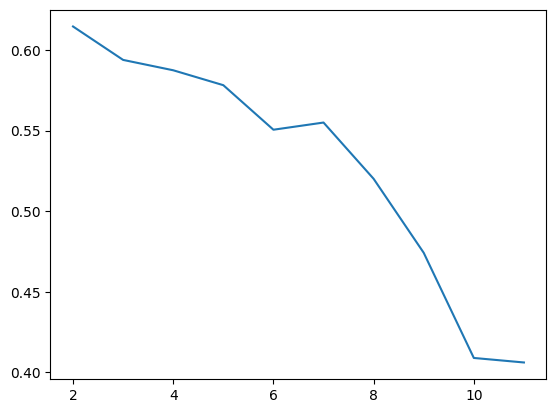

In [66]:
# Vishvalizing and checking silhouette score for better understanding to find the best value of k
score = []
k_num = list(range(2, 12))
for i in k_num:
  model = KMeans(n_clusters=i)
  preds = model.fit_predict(df)
  sil = silhouette_score(df, preds)
  score.append(sil)

plt.plot(k_num, score);

In [67]:
# Selecting the best model and fitting the data
model = KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [68]:
# Viewing the clusters
pca_model_data = pd.concat([pca_data, pd.DataFrame({'Clusters':model.labels_})], axis=1)
pca_model_data

,PCA1,PCA2,Clusters
0,-0.455134,-0.310439,1
1,0.521228,-0.118512,2
2,0.534797,-0.247651,2
3,0.518332,-0.371822,2
4,-0.487691,-0.476188,1
...,...,...,...
330,0.490883,0.483861,0
331,0.485440,0.417180,0
332,-0.565526,0.438584,3
333,0.465610,0.412478,0


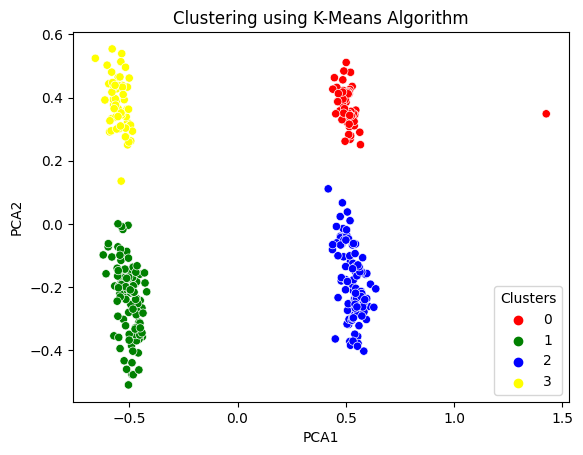

In [69]:
# Vishvalizing the clustered data
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='Clusters', data=pca_model_data, palette=['red', 'green', 'blue', 'yellow']);
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [70]:
# Adding the clustered data column to the preprocessed data
df['Clusters'] = model.labels_
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Clusters
0,0.254545,0.666667,0.060990,0.291667,2,1
1,0.269091,0.511905,0.061964,0.305556,1,2
2,0.298182,0.583333,0.063718,0.152778,1,2
4,0.167273,0.738095,0.063328,0.208333,1,2
5,0.261818,0.892857,0.062744,0.263889,2,1
...,...,...,...,...,...,...
338,0.549091,0.071429,0.067420,0.618056,1,0
340,0.534545,0.142857,0.067615,0.597222,1,0
341,0.665455,0.309524,0.068979,0.847222,2,3
342,0.476364,0.202381,0.067030,0.694444,1,0


In [71]:
# Adding the clustered data column to the existing data
D = data.dropna()
D['Clusters'] = model.labels_
New_Penguin_Data = D
New_Penguin_Data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Clusters
0,39.1,18.7,181.0,3750.0,MALE,1
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
4,36.7,19.3,193.0,3450.0,FEMALE,2
5,39.3,20.6,190.0,3650.0,MALE,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,0
340,46.8,14.3,215.0,4850.0,FEMALE,0
341,50.4,15.7,222.0,5750.0,MALE,3
342,45.2,14.8,212.0,5200.0,FEMALE,0


<Axes: xlabel='Clusters', ylabel='count'>

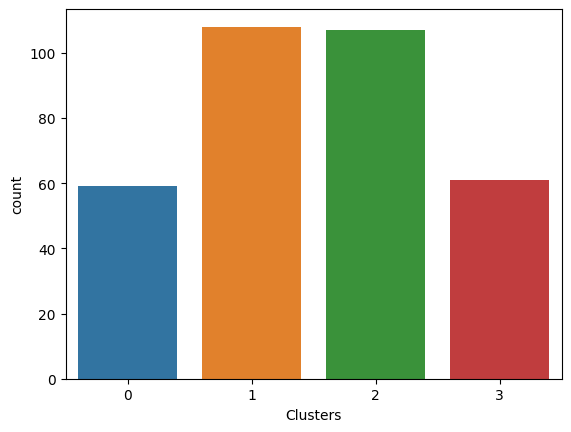

In [72]:
# Vishvalizing the clusters and their count
sns.countplot(x='Clusters', data=New_Penguin_Data)

In [73]:
New_Penguin_Data.to_csv('New_Penguin_Data.csv') # Saving the newly created dataset

In [74]:
joblib.dump(model, 'Penguin_Species_Clustering.pkl') # Saving the model

['Penguin_Species_Clustering.pkl']

In [75]:
# Spliting the data from the newly created dataset
X = df.drop('Clusters', axis=1)
y = df['Clusters']

In [76]:
# Creating training and testing data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Checking shapes of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((268, 5), (67, 5), (268,), (67,))

In [82]:
# Creating a dictionary of models and their parameters for  Cross Validation and  Hyperparameter Tuning
params = {
    'SVM' : {
        'model':SVC(),
        'param':{
            'C':[5, 10, 20]
            }
        },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{'max_features':['int', 'float', 'auto', 'sqrt', 'log2', 'None'],
                 'max_leaf_nodes':[50, 60, 70]
                 }
        },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[1, 5, 10]
            }
        },
    'LogisticRegression':{'model':LogisticRegression(),
                          'param':{
                              'C':[1, 5, 10],
                              'solver':['lbfgs', 'newton-cg', 'sag', 'saga', 'Liblinear'],
                              'multi_class':['auto', 'ovr']
                              }
                          },
    'MultinomialNB':{
        'model':MultinomialNB(force_alpha=False),
        'param':{
            'alpha':[0,1.0,1.5,2.0,2.5,3.0]
            }
        },
    'KNighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'weights':['uniform', 'distance'],
            'leaf_size':[30,35,40],
            'p':[1,2],
            'n_jobs':[1,-1]
            }
        }
    }

In [89]:
# Performing Cross Validation and  Hyperparameter Tuning to find the best model
score = []

for model_name, mp in params.items():
  clf = GridSearchCV(mp['model'], mp['param'], cv=5, scoring='accuracy', verbose=10)
  clf.fit(X, y)
  score.append({
      'Model Name':model_name,
      'Best Param':clf.best_params_,
      'Best Score':clf.best_score_
      })

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=5.........................................................
[CV 1/5; 1/3] END ..........................C=5;, score=1.000 total time=   0.0s
[CV 2/5; 1/3] START C=5.........................................................
[CV 2/5; 1/3] END ..........................C=5;, score=1.000 total time=   0.0s
[CV 3/5; 1/3] START C=5.........................................................
[CV 3/5; 1/3] END ..........................C=5;, score=1.000 total time=   0.0s
[CV 4/5; 1/3] START C=5.........................................................
[CV 4/5; 1/3] END ..........................C=5;, score=1.000 total time=   0.0s
[CV 5/5; 1/3] START C=5.........................................................
[CV 5/5; 1/3] END ..........................C=5;, score=1.000 total time=   0.0s
[CV 1/5; 2/3] START C=10........................................................
[CV 1/5; 2/3] END .........................C=10;,

In [90]:
n = pd.DataFrame(score)
n

,Model Name,Best Param,Best Score
0,SVM,{'C': 5},1.000000
1,DecisionTreeClassifier,"{'max_features': 'sqrt', 'max_leaf_nodes': 50}",0.988060
2,RandomForestClassifier,{'n_estimators': 5},0.997015
3,LogisticRegression,"{'C': 1, 'multi_class': 'auto', 'solver': 'lbf...",1.000000
4,MultinomialNB,{'alpha': 0},0.567164
5,KNighborsClassifier,"{'leaf_size': 30, 'n_jobs': 1, 'p': 1, 'weight...",1.000000


In [93]:
# Selecting the best model and fitting the train and test data
model = KNeighborsClassifier(leaf_size=30, n_jobs=1, p=1, weights='uniform')
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1, p=1)

In [95]:
model.score(X_test, y_test) # Checking the test score

1.0

In [100]:
# Checking the test score using accuracy_score function
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)

1.0

In [96]:
model.score(X_train, y_train) # Checking the train score

1.0

In [101]:
y_train_pred = model.predict(X_train) # Checking the testing score using accuracy_score function
accuracy_score(y_train, y_train_pred)

1.0

In [104]:
# Checking Precision,	Recall, F1-Score using classification_report function
report = classification_report(y_test, y_test_pred, output_dict=True)
x = pd.DataFrame(report).transpose()
x

,precision,recall,f1-score,support
0,1.0,1.0,1.0,7.0
1,1.0,1.0,1.0,20.0
2,1.0,1.0,1.0,27.0
3,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,67.0
weighted avg,1.0,1.0,1.0,67.0


Text(0.5, 1.0, 'CONFUSION MATRIX')

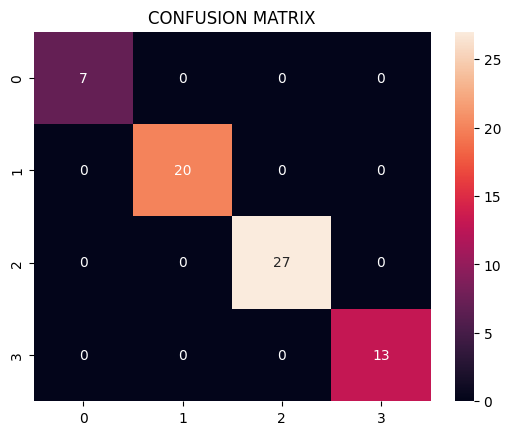

In [106]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.title('CONFUSION MATRIX')

In [107]:
pickle.dump(model, open('Penguin_Species_Classification.pkl', 'wb')) # Saving the model

In [109]:
loaded_model = pickle.load(open('Penguin_Species_Classification.pkl', 'rb')) # Loading the saved model

In [113]:
# Making predictions with the loaded model
# Custom Input : 0.556575,0.866667,0.160990,0.091667,1

input_data = tuple(map(float, input('Input: ').split(',')))

input_data_to_numpy_array = np.array(input_data)

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if prediction == 0:
  print(prediction, 'Belongs to the first group')
elif prediction == 1:
  print(prediction, 'Belongs to the second group')
elif prediction == 2:
  print(prediction, 'Belongs to the third group')
else:
  print(prediction, 'Belongs to the fourth group')

Input: 0.556575,0.866667,0.160990,0.091667,1
[2] Belongs to the third group
